# Tests for DM-21cm paper

ArXiv 2312.17499


In [1]:
import matplotlib.pyplot as plt
import py21cmfast as p21c
import numpy as np
import PyLab as PL

plt.rcParams.update({
    'text.usetex': True,
    'font.family':'Times',
    'text.latex.preamble': r'\usepackage{newtxtext,newtxmath}'})

%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib widget

# Halo Concentration

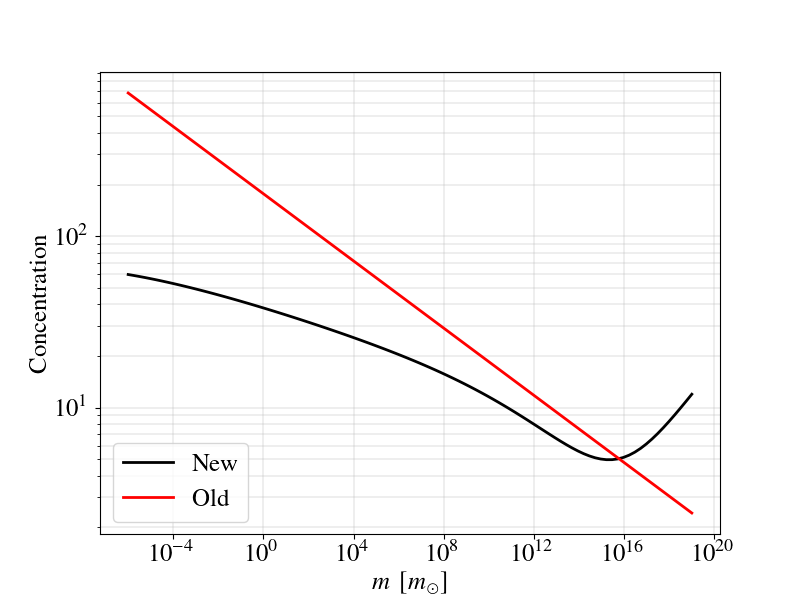

In [3]:
def compute_concentration(m, model = 'Sanchez'):
    if model == 'extrap':
        r = 1.766E2 * m**-0.098
    else:
        prefix = [37.5153, -1.5093, 1.636E-2, 3.66E-4, -2.89237E-5, 5.32E-7]
        r = 0*m
        lnm = np.log(m*0.6766)
        for idx in np.arange(0, 6):
            r += prefix[idx] * lnm**idx
    return r

def Plot_Concentration():
    LineWidth = 2
    FontSize = 18

    m = np.logspace(-6, 19, 100)
    c1 = compute_concentration(m, 'Sanchez')
    c2 = compute_concentration(m, 'extrap')

    fig, ax = plt.subplots()
    ax.grid(True, which='both', linewidth = 0.3)  # `which='both'` enables major and minor grids
    fig.set_size_inches(8, 6)
    plt.loglog(m, c1, 'k', linewidth=LineWidth, label = 'New')
    plt.loglog(m, c2, 'r', linewidth=LineWidth, label = 'Old')
    plt.xlabel('$m\ [m_\odot]$',fontsize=FontSize,fontname='Times New Roman')
    plt.ylabel('Concentration',fontsize=FontSize,fontname='Times New Roman')
    plt.xticks(size=FontSize)
    plt.yticks(size=FontSize)
    plt.legend(fontsize=FontSize,loc = 'lower left')
    
Plot_Concentration()

# Boost Factor

Vary HMF in each panel

[0 1 2 3 4]
[0 1 2 3]


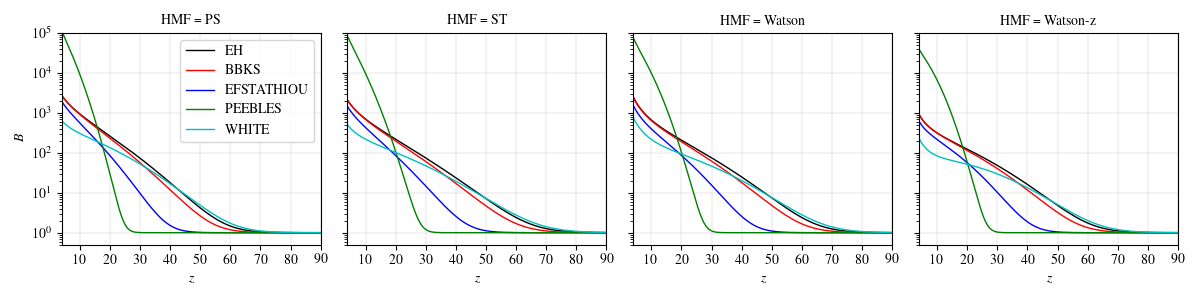

In [4]:
def Plot_Boost_HMF():
    LineWidth = 1
    FontSize = 10

    d = np.load('/Users/cangtao/FileVault/GitHub/21cmFAST/src/py21cmfast/DarkSide/data/BoostTemplates.npz')
    z = d['z']
    B = d['B']
    HMF = d['HMF']
    PS = d['PS']
    print(PS)
    print(HMF)

    fig, axs = plt.subplots(1, 4, sharex = 1, sharey = 1)
    fig.set_size_inches(12, 3)

    color = ['k', 'r', 'b', 'g', 'c']
    legends = ['EH', 'BBKS', 'EFSTATHIOU', 'PEEBLES', 'WHITE']
    titles = ['PS', 'ST', 'Watson', 'Watson-z']

    for hid in HMF:
        axs[hid].grid(True, which='major', linewidth = 0.2)
        for pid in PS:
            axs[hid].semilogy(z, B[hid, pid, :], color[pid], linewidth = LineWidth, label = legends[pid])
        axs[hid].set_xlabel('$z$',fontsize=FontSize,fontname='Times New Roman')
        axs[hid].set_xlim(4, 90)
        axs[hid].set_ylim(0.5, 1E5)
        axs[hid].tick_params(axis='both', which='both', labelsize = FontSize)
        axs[hid].set_title('HMF = ' + titles[hid],fontsize=FontSize)
        axs[hid].set_xticks(np.linspace(10, 90, 9))
        axs[hid].set_yticks(np.logspace(0, 5, 6))
    axs[0].set_ylabel('$B$',fontsize=FontSize,fontname='Times New Roman')
    axs[0].legend(fontsize=FontSize, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('/Users/cangtao/Desktop/tmp_HMF.pdf')

Plot_Boost_HMF()

Vary Transfer Function in each panel

PS = [0 1 2 3 4]
HMF = [0 1 2 3]


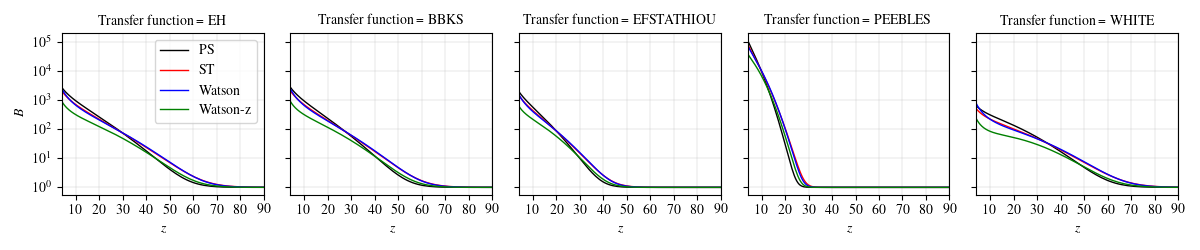

In [4]:
def Plot_Boost_TF():
    LineWidth = 1
    FontSize = 10

    d = np.load('/Users/cangtao/FileVault/GitHub/21cmFAST/src/py21cmfast/DarkSide/data/BoostTemplates.npz')
    z = d['z']
    B = d['B']
    HMF = d['HMF']
    PS = d['PS']
    print('PS =',PS)
    print('HMF =',HMF)

    fig, axs = plt.subplots(1, 5, sharex = 1, sharey = 1)
    fig.set_size_inches(12, 2.5)

    color = ['k', 'r', 'b', 'g', 'c']
    legends = ['EH', 'BBKS', 'EFSTATHIOU', 'PEEBLES', 'WHITE']
    titles = ['PS', 'ST', 'Watson', 'Watson-z']

    titles = ['EH', 'BBKS', 'EFSTATHIOU', 'PEEBLES', 'WHITE']
    legends = ['PS', 'ST', 'Watson', 'Watson-z']

    for pid in PS:
        axs[pid].grid(True, which='both', linewidth = 0.2)
        for hid in HMF:
            axs[pid].semilogy(z, B[hid, pid, :], color[hid], linewidth = LineWidth, label = legends[hid])
        axs[pid].set_xlabel('$z$',fontsize=FontSize,fontname='Times New Roman')
        axs[pid].set_xlim(4, 90)
        axs[pid].tick_params(axis='both', which='both', labelsize = FontSize)
        axs[pid].set_title('Transfer function = ' + titles[pid],fontsize=FontSize)
        axs[pid].set_xticks(np.linspace(10, 90, 9))
        axs[pid].set_yticks(np.logspace(0, 5, 6))
    axs[0].set_ylabel('$B$',fontsize=FontSize,fontname='Times New Roman')
    axs[0].legend(fontsize=FontSize, loc = 'upper right')
    plt.tight_layout()
    plt.savefig('/Users/cangtao/Desktop/tmp_TF.pdf')

Plot_Boost_TF()

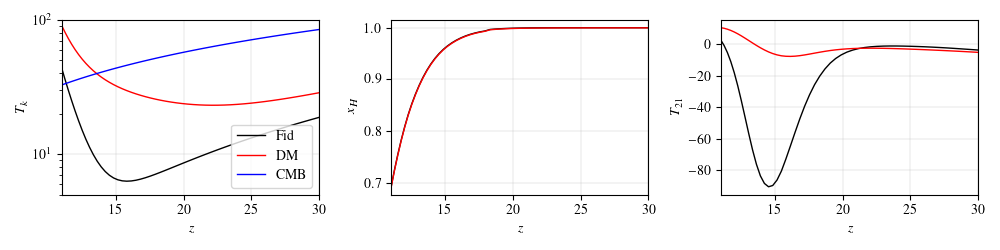

In [7]:
def Plot_Global():
    LineWidth = 1
    FontSize = 10

    f0 = '/Users/cangtao/Desktop/21cmFAST-data/BoostFactor_v3/Fiducial.h5'
    f1 = '/Users/cangtao/Desktop/21cmFAST-data/BoostFactor_v3/IHM.h5'

    lc = p21c.LightCone.read(f0)
    z0 = lc.node_redshifts
    t0 = lc.global_brightness_temp
    tk0 = lc.global_Tk
    xH0 = lc.global_xHI

    lc = p21c.LightCone.read(f1)
    z1 = lc.node_redshifts
    t1 = lc.global_brightness_temp
    tk1 = lc.global_Tk
    xH1 = lc.global_xHI
    # print(xH1)

    fig, axs = plt.subplots(1, 3, sharex = 1, sharey = 0)
    fig.set_size_inches(10, 2.5)
    
    idx = 0
    axs[idx].grid(True, which='major', linewidth = 0.2) # Show grid, if u wanna show both minor and major grid, use which='both'
    axs[idx].plot(z0, tk0, 'k', linewidth = LineWidth, label='Fid')
    axs[idx].plot(z1, tk1, 'r', linewidth = LineWidth, label='DM')
    axs[idx].plot(z1, 2.728*(1+z1), 'b', linewidth = LineWidth, label='CMB')
    axs[idx].legend(fontsize=FontSize, loc = 'lower right')
    axs[idx].set_xlabel('$z$',fontsize=FontSize,fontname='Times New Roman')
    axs[idx].set_ylabel('$T_{k}$',fontsize=FontSize,fontname='Times New Roman')
    axs[idx].tick_params(axis='both', which='both', labelsize = FontSize)
    axs[idx].set_xlim(11, 30)
    axs[idx].set_ylim(5, 1E2)
    axs[idx].set_yscale('log')

    idx = 1
    axs[idx].grid(True, which='major', linewidth = 0.2)
    axs[idx].plot(z0, xH0, 'k', linewidth = LineWidth, label='Fid')
    axs[idx].plot(z1, xH1, 'r', linewidth = LineWidth, label='DM')
    # axs[idx].legend(fontsize=FontSize, loc = 'lower right')
    axs[idx].set_xlabel('$z$',fontsize=FontSize,fontname='Times New Roman')
    axs[idx].set_ylabel('$x_{H}$',fontsize=FontSize,fontname='Times New Roman')
    axs[idx].tick_params(axis='both', which='both', labelsize = FontSize)
    axs[idx].set_xlim(11, 30)
    # axs[idx].set_ylim(5, 1E2)
    # axs[idx].set_yscale('log')

    idx = 2
    axs[idx].grid(True, which='major', linewidth = 0.2) # Show grid, if u wanna show both minor and major grid, use which='both'
    axs[idx].plot(z0, t0, 'k', linewidth = LineWidth, label='Fid')
    axs[idx].plot(z1, t1, 'r', linewidth = LineWidth, label='DM')
    # axs[idx].legend(fontsize=FontSize, loc = 'lower right')
    axs[idx].set_xlabel('$z$',fontsize=FontSize,fontname='Times New Roman')
    axs[idx].set_ylabel('$T_{21}$',fontsize=FontSize,fontname='Times New Roman')
    axs[idx].tick_params(axis='both', which='both', labelsize = FontSize)
    axs[idx].set_xlim(11, 30)
    # axs[idx].set_ylim(5, 1E2)
    # axs[idx].set_yscale('log')
    plt.tight_layout()

Plot_Global()
